<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import pingouin as pg
import scikit_posthocs as sp
matplotlib.style.use('/Users/sherlockshi/Documents/OneDrive - Durham University/apa.mplstyle')

In [2]:
df = pd.read_excel('Finale(V2).xlsx')

In [3]:
del df['Unnamed: 0']

In [9]:
df.groupby('game_status').agg(['std', 'mean'])

age             \
                  std       mean   
game_status                        
0            1.881888  19.782609   
1            1.874755  20.470588   
2            0.834523  20.125000   
3            1.605180  19.926471   

            before_First-Person Shooter/Third-Person Shooter            \
                                                         std      mean   
game_status                                                              
0                                                   0.288104  1.086957   
1                                                   2.016476  3.235294   
2                                                   1.726888  1.875000   
3                                                   1.819500  2.867647   

            before_Action-Role-Playing/Adventure            \
                                             std      mean   
game_status                                                  
0                                       0.344350  1.130435   
1                                       1.853058  2.941176   
2                                       0.000000  1.000000   
3                                       1.824619  3.117647   

            before_Real-Time Strategy/MOBA            \
                                       std      mean   
game_status                                            
0                                 0.208514  1.043478   
1                                 1.003670  1.411765   
2                                 1.851640  2.500000   
3                                 1.981200  2.485294   

            before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing  \
                                                                         std   
game_status                                                                    
0                                                     0.208514                 
1                                                     0.507300                 
2                                                     1.807722                 
3                                                     1.835354                 

                       ...   b4_score             b5_score             \
                 mean  ...        std      mean        std       mean   
game_status            ...                                              
0            1.043478  ...  11.561829 -0.695652  11.189351  -1.739130   
1            1.411765  ...  11.618950  0.000000  11.998774  -1.294118   
2            2.125000  ...  12.623674  4.250000  10.222524  10.250000   
3            2.279412  ...  11.915417 -1.411765  12.234000   1.029412   

            dm_under_limited           dm_under_risk            gender_coded  \
                         std      mean           std       mean          std   
game_status                                                                    
0                  14.791302 -7.652174     28.191889  -4.347826     0.208514   
1                  14.354749 -9.058824     27.103831  -1.647059     0.514496   
2                  10.525479 -8.750000     29.721325  12.750000     0.517549   
3                  12.494740 -7.029412     29.427356  -1.029412     0.501972   

                       
                 mean  
game_status            
0            0.043478  
1            0.529412  
2            0.375000  
3            0.323529  

[4 rows x 78 columns]

In [ ]:
df.groupby('game_status')['gender_coded'].value_counts()

game_status  gender_coded
0            0               22
             1                1
1            1                9
             0                8
2            0                5
             1                3
3            0               47
             1               20
             2                1
Name: gender_coded, dtype: int64

In [4]:
# use shapiro test to test normality of the data 
columns = list(df.columns)
for i in columns:
    print(f'{i}\n {stats.shapiro(df[i])}')

age
 ShapiroResult(statistic=0.874389111995697, pvalue=1.8017345837506582e-08)
before_First-Person Shooter/Third-Person Shooter
 ShapiroResult(statistic=0.7758395075798035, pvalue=5.070707308901801e-12)
before_Action-Role-Playing/Adventure
 ShapiroResult(statistic=0.7935534119606018, pvalue=1.7913205641040264e-11)
before_Real-Time Strategy/MOBA
 ShapiroResult(statistic=0.632839560508728, pvalue=1.308124755333717e-15)
before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing
 ShapiroResult(statistic=0.6108644008636475, pvalue=4.567213298298212e-16)
before_2D Turn-Based Strategy/Card Game
 ShapiroResult(statistic=0.7334206700325012, pvalue=3.1911043360706437e-13)
before_3D Puzzle Game
 ShapiroResult(statistic=0.5974526405334473, pvalue=2.4542366718131566e-16)
before_Sports/Driving
 ShapiroResult(statistic=0.8136954307556152, pvalue=8.250696653666623e-11)
before_Music Game
 ShapiroResult(statistic=0.6375501155853271, pvalue=1.6488717104540186e-15)
before_Others
 ShapiroResult(stati

In [184]:
avg = df[df['game_status'] == 1]
svg = df[df['game_status'] == 2]
fusion = df[df['game_status'] == 3]
ngamer = df[df['game_status'] == 0]

In [10]:
avg_cspan = avg['cspan']
svg_cspan = svg['cspan']
fusion_cspan = fusion['cspan']
ngamer_cspan = ngamer['cspan']

In [11]:
# Corsi-span Non-parametric ANOVA
stats.kruskal(avg_cspan, svg_cspan, fusion_cspan, ngamer_cspan) 

KruskalResult(statistic=1.967275004336574, pvalue=0.5792266065134815)

In [12]:
# Stroop effect 
avg_stroop = avg['stroop_effect']
svg_stroop = svg['stroop_effect']
fusion_stroop = fusion['stroop_effect'] 
ngamer_stroop = ngamer['stroop_effect']
stats.kruskal(avg_stroop, svg_stroop, fusion_stroop, ngamer_stroop)

KruskalResult(statistic=8.385984354761044, pvalue=0.038673081495689196)

In [13]:
# IGT RT effect 
avg_igtrt = avg['igt_rt_avg']
svg_igtrt = svg['igt_rt_avg']
fusion_igtrt = fusion['igt_rt_avg'] 
ngamer_igtrt = ngamer['igt_rt_avg']
stats.kruskal(avg_igtrt, svg_igtrt, fusion_igtrt, ngamer_igtrt)

KruskalResult(statistic=4.926129127379809, pvalue=0.17728694042763293)

In [14]:
# Pingouin corsi-span
pg.kruskal(data=df, dv='cspan', between='game_status')

,Source,ddof1,H,p-unc
Kruskal,game_status,3,1.967275,0.579227


In [15]:
# Pingouin stroop effect
pg.kruskal(data=df, dv='stroop_effect', between='game_status')

,Source,ddof1,H,p-unc
Kruskal,game_status,3,8.385984,0.038673


In [16]:
# Pingouin Igt RT
pg.kruskal(data=df, dv='igt_rt_avg', between='game_status') 

,Source,ddof1,H,p-unc
Kruskal,game_status,3,4.926129,0.177287


In [17]:
# Pingouin IGT decision-making under limited information
pg.kruskal(data=df, dv='dm_under_limited', between='game_status') 

,Source,ddof1,H,p-unc
Kruskal,game_status,3,0.421452,0.935776


In [18]:
# Pingouin IGT decision-making under limited information
pg.kruskal(data=df, dv='dm_under_risk', between='game_status') 

,Source,ddof1,H,p-unc
Kruskal,game_status,3,1.982099,0.57613


In [33]:
sp.posthoc_mannwhitney(df, 'stroop_effect','game_status', p_adjust='bonferroni')

,0,1,2,3
0,1.000000,1.000000,0.135715,0.176416
1,1.000000,1.000000,0.452949,1.000000
2,0.135715,0.452949,1.000000,1.000000
3,0.176416,1.000000,1.000000,1.000000


In [35]:
sp.posthoc_dunn(df, 'stroop_effect','game_status', p_adjust='bonferroni')

,0,1,2,3
0,1.000000,1.000000,0.096774,0.171254
1,1.000000,1.000000,0.356336,1.000000
2,0.096774,0.356336,1.000000,1.000000
3,0.171254,1.000000,1.000000,1.000000


In [60]:
# Spearman Correlation
pg.rcorr(df, method = 'spearman', decimals= 3).to_excel('Correlation_matrix.xlsx')

In [58]:
# Spearman Correlation on before
vgq = df['before_First-Person Shooter/Third-Person Shooter']
cspan = df['cspan']
pg.corr(vgq, cspan, tail = 'two-sided', method = 'spearman') 

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,116,0.272379,"[0.09, 0.43]",0.07419,0.057804,0.003097,0.846573


In [6]:
# Spearman Correlation on during
vgq = df['during_First-Person Shooter/Third-Person Shooter']
cspan = df['cspan']
pg.corr(vgq, cspan, tail = 'two-sided', method = 'spearman') 

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,116,0.232992,"[0.05, 0.4]",0.054285,0.037547,0.011837,0.716579


In [7]:
# Spearman Correlation on igt_rt
vgq = df['before_Action-Role-Playing/Adventure']
igt_rt = df['igt_rt_avg']
print(pg.corr(vgq, igt_rt, tail = 'two-sided', method = 'spearman'))
vgq = df['during_Action-Role-Playing/Adventure']
print(pg.corr(vgq, igt_rt, tail = 'two-sided', method = 'spearman'))

            n         r           CI95%        r2    adj_r2    p-val     power
spearman  116 -0.261168  [-0.42, -0.08]  0.068209  0.051717  0.00463  0.814078
            n         r          CI95%        r2    adj_r2     p-val     power
spearman  116 -0.279096  [-0.44, -0.1]  0.077895  0.061574  0.002414  0.864212


In [8]:
# Spearman Correlation on stroop effect
vgq = df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing']
stroop = df['stroop_effect']
print(pg.corr(vgq, stroop, tail = 'two-sided', method = 'spearman'))
vgq = df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing']
print(pg.corr(vgq, stroop, tail = 'two-sided', method = 'spearman'))

            n         r         CI95%        r2    adj_r2     p-val    power
spearman  116  0.271375  [0.09, 0.43]  0.073645  0.057249  0.003212  0.84382
            n       r         CI95%       r2    adj_r2     p-val     power
spearman  116  0.2493  [0.07, 0.41]  0.06215  0.045551  0.006961  0.775632


In [4]:
# define groups
avg = df[df['game_status'] == 1]
svg = df[df['game_status'] == 2]
fusion = df[df['game_status'] == 3]
ngamer = df[df['game_status'] == 0]

/Users/sherlockshi/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/boxplot.py:298: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  bp = ax.boxplot(values, **kwds)


([<matplotlib.axis.XTick at 0x7fb6e296d160>,
 [Text(1, 0, 'Control'), Text(2, 0, 'Congruent'), Text(3, 0, 'Incongruent')])

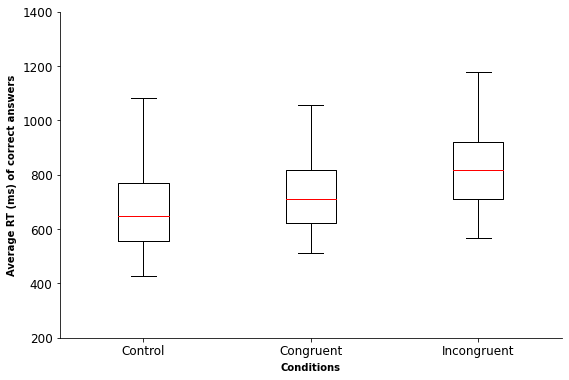

In [78]:
ax = df.boxplot(column = ['str_c_rt_avg_control', 'str_c_rt_avg_congruent', 'str_c_rt_avg_incongruent'], return_type='axes', figsize=(9, 6), grid = False, fontsize=12, whis = 'range')
ax.set_xlabel('Conditions')
ax.set_ylabel('Average RT (ms) of correct answers')
plt.xticks([1, 2, 3], ['Control', 'Congruent', 'Incongrunt'])

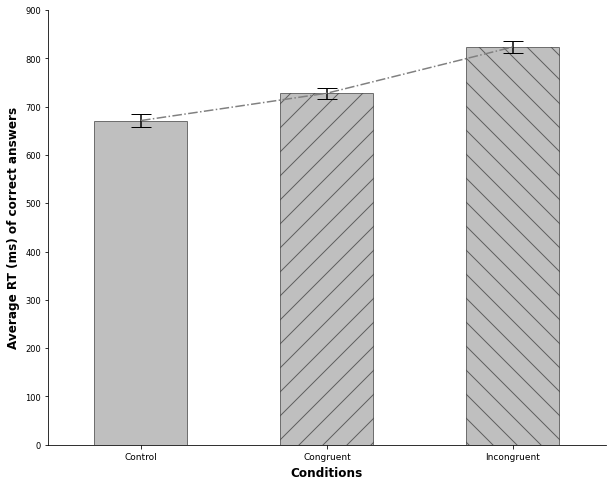

In [171]:
# prepare columns for bar plot
rt_trol = np.array(df['str_c_rt_avg_control'])
rt_con = np.array(df['str_c_rt_avg_congruent'])
rt_incon = np.array(df['str_c_rt_avg_incongruent'])

# mean of str_c_rt_avg_control, str_c_rt_avg_congruent, str_c_rt_avg_incongruent
trol_mean = np.mean(rt_trol)
con_mean = np.mean(rt_con)
incon_mean = np.mean(rt_incon)

# sem of str_c_rt_avg_control, str_c_rt_avg_congruent, str_c_rt_avg_incongruent
trol_sem= np.std(rt_trol, ddof=1) / np.sqrt(np.size(rt_trol))
con_sem = np.std(rt_con, ddof=1) / np.sqrt(np.size(rt_con))
incon_sem = np.std(rt_incon, ddof = 1) / np.sqrt(np.size(rt_incon))

# Create lists for xticks of bar plot
conditions = ['Control', 'Congruent', 'Incongruent']

# plot the bar plot
fig, ax = plt.subplots(figsize = (10, 8))

ax.bar(1, trol_mean, yerr=trol_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       width = 0.5)
ax.bar(2, con_mean, yerr=con_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       hatch = '/', width = 0.5)
ax.bar(3, incon_mean, yerr=incon_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       hatch = '\\', width = 0.5)
ax.plot([1, 2, 3], [trol_mean, con_mean, incon_mean])

ax.set_ylabel('Average RT (ms) of correct answers', fontsize = 12)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(conditions, fontsize = 9)
ax.set_xlabel('Conditions', fontsize = 12)
ax.yaxis.grid(False)

# Save the figure and show
plt.show()

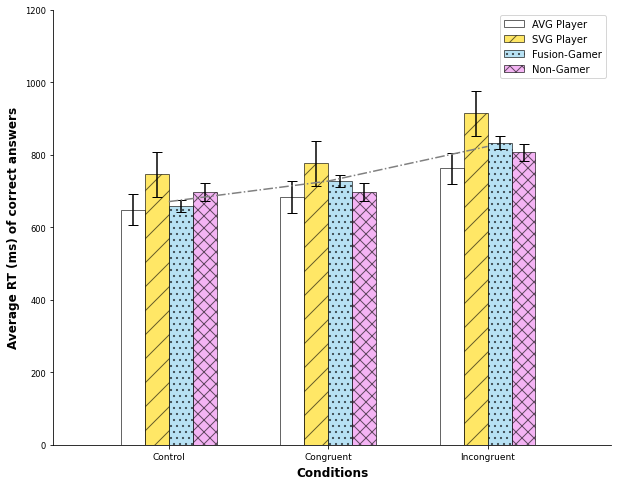

In [74]:
# prepare columns for bar plot
avg_control = np.array(avg['str_c_rt_avg_control'])
avg_congruent = np.array(avg['str_c_rt_avg_congruent'])
avg_incongruent = np.array(avg['str_c_rt_avg_incongruent'])

svg_control = np.array(svg['str_c_rt_avg_control'])
svg_congruent = np.array(svg['str_c_rt_avg_congruent'])
svg_incongruent = np.array(svg['str_c_rt_avg_incongruent'])

f_control = np.array(fusion['str_c_rt_avg_control'])
f_congruent = np.array(fusion['str_c_rt_avg_congruent'])
f_incongruent = np.array(fusion['str_c_rt_avg_incongruent'])

n_control = np.array(ngamer['str_c_rt_avg_control'])
n_congruent = np.array(ngamer['str_c_rt_avg_congruent'])
n_incongruent = np.array(ngamer['str_c_rt_avg_incongruent'])

# Mean of each group
avg_t_mean = np.mean(avg_control)
avg_c_mean = np.mean(avg_congruent)
avg_i_mean = np.mean(avg_incongruent)

svg_t_mean = np.mean(svg_control)
svg_c_mean = np.mean(svg_congruent)
svg_i_mean = np.mean(svg_incongruent)

f_t_mean = np.mean(f_control)
f_c_mean = np.mean(f_congruent)
f_i_mean = np.mean(f_incongruent)

n_t_mean = np.mean(n_control)
n_c_mean = np.mean(n_congruent)
n_i_mean = np.mean(n_incongruent)

# mean of str_c_rt_avg_control, str_c_rt_avg_congruent, str_c_rt_avg_incongruent
rt_trol = np.array(df['str_c_rt_avg_control'])
rt_con = np.array(df['str_c_rt_avg_congruent'])
rt_incon = np.array(df['str_c_rt_avg_incongruent'])

trol_mean = np.mean(rt_trol)
con_mean = np.mean(rt_con)
incon_mean = np.mean(rt_incon)

# sem of str_c_rt_avg_control, str_c_rt_avg_congruent, str_c_rt_avg_incongruent

def sem(series):
    sample_sem = np.std(series, ddof = 1) / np.sqrt(np.size(series))
    return sample_sem

#########
avg_t_sem = sem(avg_control)
avg_c_sem = sem(avg_congruent)
avg_i_sem = sem(avg_incongruent)

svg_t_sem = sem(svg_control)
svg_c_sem = sem(svg_congruent)
svg_i_sem = sem(svg_incongruent)

f_t_sem = sem(f_control)
f_c_sem = sem(f_congruent)
f_i_sem = sem(f_incongruent)

n_t_sem = sem(n_control)
n_c_sem = sem(n_congruent)
n_i_sem = sem(n_incongruent)

#########
# trol_sem= np.std(rt_trol, ddof=1) / np.sqrt(np.size(rt_trol))
# con_sem = np.std(rt_con, ddof=1) / np.sqrt(np.size(rt_con))
# incon_sem = np.std(rt_incon, ddof = 1) / np.sqrt(np.size(rt_incon))

# Create lists for xticks of bar plot
conditions = ['Control', 'Congruent', 'Incongruent']
avgs = [avg_t_mean, avg_c_mean, avg_i_mean]
svgs = [svg_t_mean, svg_c_mean, svg_i_mean]
fs = [f_t_mean, f_c_mean, f_i_mean]
ns = [n_t_mean, n_t_mean, n_i_mean]

# plot the bar plot
fig, ax = plt.subplots(figsize = (10, 8))
width = 0.15  # the width of the bars

x1 = np.arange(len(conditions))  # the label locations
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]

ax.bar(x1, avgs, yerr=avg_t_sem, ecolor = 'black', alpha = 0.6, color = 'white', edgecolor = 'black', 
       width = width, label = 'AVG Player', capsize = 5) 
ax.bar(x2, svgs, yerr=svg_t_sem, ecolor = 'black', alpha = 0.6, color = 'gold', edgecolor = 'black', 
       hatch = '/', width = width, label = 'SVG Player', capsize = 5)
ax.bar(x3, fs, yerr=f_t_sem, ecolor = 'black', alpha = 0.6, color = 'skyblue', edgecolor = 'black', 
       hatch = '..', width = width, label = 'Fusion-Gamer', capsize = 5)
ax.bar(x4, ns, yerr=n_t_sem, ecolor = 'black', alpha = 0.6, color = 'violet', edgecolor = 'black', 
       hatch = 'xx', width = width, label = 'Non-Gamer', capsize = 5)

ax.plot([0.225, 01.225, 2.225], [trol_mean, con_mean, incon_mean], '-.')

ax.set_ylabel('Average RT (ms) of correct answers', fontsize = 12)
ax.set_xticks([0.225, 01.225, 2.225])
ax.set_xticklabels(conditions, fontsize = 9)
ax.set_xlabel('Conditions', fontsize = 12)
ax.yaxis.grid(False)
ax.legend()

# Save the figure and show
plt.savefig('Groupbar_avgRT')
plt.show()

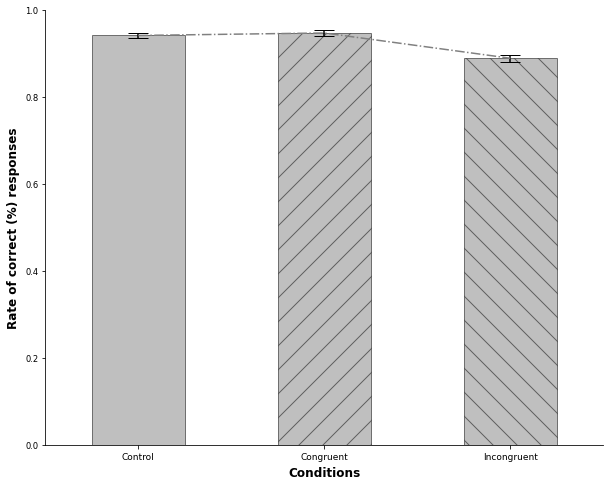

In [172]:
# prepare columns for bar plot
rt_trol = np.array(df['correct_rate_control'])
rt_con = np.array(df['correct_rate_congruent'])
rt_incon = np.array(df['correct_rate_incongruent'])

# get mean
trol_mean = np.mean(rt_trol)
con_mean = np.mean(rt_con)
incon_mean = np.mean(rt_incon)

# sem of str_c_rt_avg_control, str_c_rt_avg_congruent, str_c_rt_avg_incongruent
trol_sem= np.std(rt_trol, ddof=1) / np.sqrt(np.size(rt_trol))
con_sem = np.std(rt_con, ddof=1) / np.sqrt(np.size(rt_con))
incon_sem = np.std(rt_incon, ddof = 1) / np.sqrt(np.size(rt_incon))

# Create lists for xticks of bar plot
conditions = ['Control', 'Congruent', 'Incongruent']

# plot the bar plot
fig, ax = plt.subplots(figsize = (10, 8))

ax.bar(1, trol_mean, yerr=trol_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       width = 0.5)
ax.bar(2, con_mean, yerr=con_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       hatch = '/', width = 0.5)
ax.bar(3, incon_mean, yerr=incon_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       hatch = '\\', width = 0.5)
ax.plot([1, 2, 3], [trol_mean, con_mean, incon_mean])

ax.set_ylabel('Rate of correct (%) responses', fontsize = 12)
ax.set_ylim(0, 1)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(conditions, fontsize = 9)
ax.set_xlabel('Conditions', fontsize = 12)
ax.yaxis.grid(False)

# Save the figure and show
plt.savefig('Bar_Stroop_correctrate.svg')
plt.show()

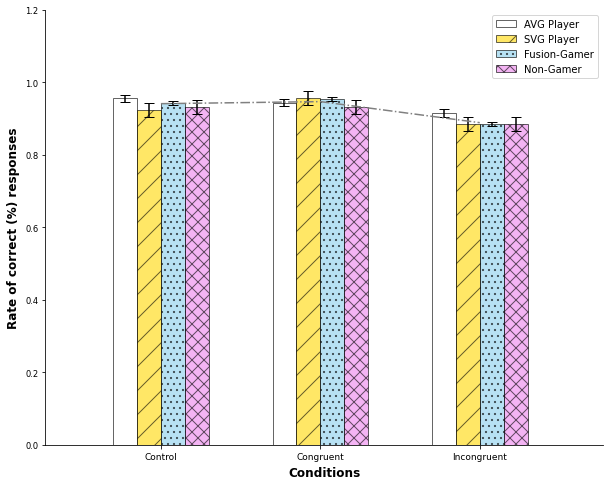

In [78]:
# prepare columns for bar plot
avg_control = np.array(avg['correct_rate_control'])
avg_congruent = np.array(avg['correct_rate_congruent'])
avg_incongruent = np.array(avg['correct_rate_incongruent'])

svg_control = np.array(svg['correct_rate_control'])
svg_congruent = np.array(svg['correct_rate_congruent'])
svg_incongruent = np.array(svg['correct_rate_incongruent'])

f_control = np.array(fusion['correct_rate_control'])
f_congruent = np.array(fusion['correct_rate_congruent'])
f_incongruent = np.array(fusion['correct_rate_incongruent'])

n_control = np.array(ngamer['correct_rate_control'])
n_congruent = np.array(ngamer['correct_rate_congruent'])
n_incongruent = np.array(ngamer['correct_rate_incongruent'])

# Mean of each group
avg_t_mean = np.mean(avg_control)
avg_c_mean = np.mean(avg_congruent)
avg_i_mean = np.mean(avg_incongruent)

svg_t_mean = np.mean(svg_control)
svg_c_mean = np.mean(svg_congruent)
svg_i_mean = np.mean(svg_incongruent)

f_t_mean = np.mean(f_control)
f_c_mean = np.mean(f_congruent)
f_i_mean = np.mean(f_incongruent)

n_t_mean = np.mean(n_control)
n_c_mean = np.mean(n_congruent)
n_i_mean = np.mean(n_incongruent)

# prepare columns for bar plot
rt_trol = np.array(df['correct_rate_control'])
rt_con = np.array(df['correct_rate_congruent'])
rt_incon = np.array(df['correct_rate_incongruent'])

# get mean
trol_mean = np.mean(rt_trol)
con_mean = np.mean(rt_con)
incon_mean = np.mean(rt_incon)

# sem of str_c_rt_avg_control, str_c_rt_avg_congruent, str_c_rt_avg_incongruent

def sem(series):
    sample_sem = np.std(series, ddof = 1) / np.sqrt(np.size(series))
    return sample_sem

#########
avg_t_sem = sem(avg_control)
avg_c_sem = sem(avg_congruent)
avg_i_sem = sem(avg_incongruent)

svg_t_sem = sem(svg_control)
svg_c_sem = sem(svg_congruent)
svg_i_sem = sem(svg_incongruent)

f_t_sem = sem(f_control)
f_c_sem = sem(f_congruent)
f_i_sem = sem(f_incongruent)

n_t_sem = sem(n_control)
n_c_sem = sem(n_congruent)
n_i_sem = sem(n_incongruent)

#########
# trol_sem= np.std(rt_trol, ddof=1) / np.sqrt(np.size(rt_trol))
# con_sem = np.std(rt_con, ddof=1) / np.sqrt(np.size(rt_con))
# incon_sem = np.std(rt_incon, ddof = 1) / np.sqrt(np.size(rt_incon))

# Create lists for xticks of bar plot
conditions = ['Control', 'Congruent', 'Incongruent']
avgs = [avg_t_mean, avg_c_mean, avg_i_mean]
svgs = [svg_t_mean, svg_c_mean, svg_i_mean]
fs = [f_t_mean, f_c_mean, f_i_mean]
ns = [n_t_mean, n_t_mean, n_i_mean]

# plot the bar plot
fig, ax = plt.subplots(figsize = (10, 8))
width = 0.15  # the width of the bars

x1 = np.arange(len(conditions))  # the label locations
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]

ax.bar(x1, avgs, yerr=avg_t_sem, ecolor = 'black', alpha = 0.6, color = 'white', edgecolor = 'black', 
       width = width, label = 'AVG Player', capsize = 5) 
ax.bar(x2, svgs, yerr=svg_t_sem, ecolor = 'black', alpha = 0.6, color = 'gold', edgecolor = 'black', 
       hatch = '/', width = width, label = 'SVG Player', capsize = 5)
ax.bar(x3, fs, yerr=f_t_sem, ecolor = 'black', alpha = 0.6, color = 'skyblue', edgecolor = 'black', 
       hatch = '..', width = width, label = 'Fusion-Gamer', capsize = 5)
ax.bar(x4, ns, yerr=n_t_sem, ecolor = 'black', alpha = 0.6, color = 'violet', edgecolor = 'black', 
       hatch = 'xx', width = width, label = 'Non-Gamer', capsize = 5)

ax.plot([0.225, 01.225, 2.225], [trol_mean, con_mean, incon_mean], '-.')

ax.set_ylabel('Rate of correct (%) responses', fontsize = 12)
ax.set_xticks([0.225, 01.225, 2.225])
ax.set_xticklabels(conditions, fontsize = 9)
ax.set_xlabel('Conditions', fontsize = 12)
ax.yaxis.grid(False)
ax.legend()

# Save the figure and show
plt.savefig('groupbar_correctness')
plt.show()

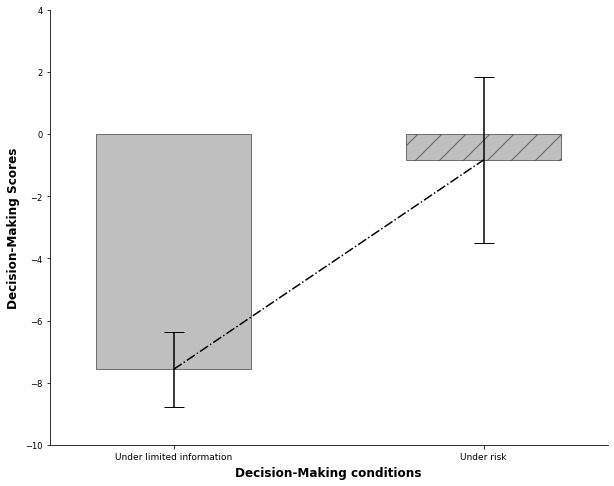

In [178]:
# prepare columns for bar plot
rt_trol = np.array(df['dm_under_limited'])
rt_con = np.array(df['dm_under_risk'])

# get mean
trol_mean = np.mean(rt_trol)
con_mean = np.mean(rt_con)

# sem of str_c_rt_avg_control, str_c_rt_avg_congruent, str_c_rt_avg_incongruent
trol_sem= np.std(rt_trol, ddof=1) / np.sqrt(np.size(rt_trol))
con_sem = np.std(rt_con, ddof=1) / np.sqrt(np.size(rt_con))

# Create lists for xticks of bar plot
conditions = ['Under limited information', 'Under risk']

# plot the bar plot
fig, ax = plt.subplots(figsize = (10, 8))

ax.bar(1, trol_mean, yerr=trol_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       width = 0.5)
ax.bar(2, con_mean, yerr=con_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       hatch = '/', width = 0.5)
ax.plot([1, 2], [trol_mean, con_mean], 'k-.') 

ax.set_ylabel('Decision-Making Scores', fontsize = 12)
ax.set_xticks([1, 2])
ax.set_xticklabels(conditions, fontsize = 9)
ax.set_xlabel('Decision-Making conditions', fontsize = 12)
ax.yaxis.grid(False)

# Save the figure and show
plt.savefig('Bar_IGTDMS')
plt.show()

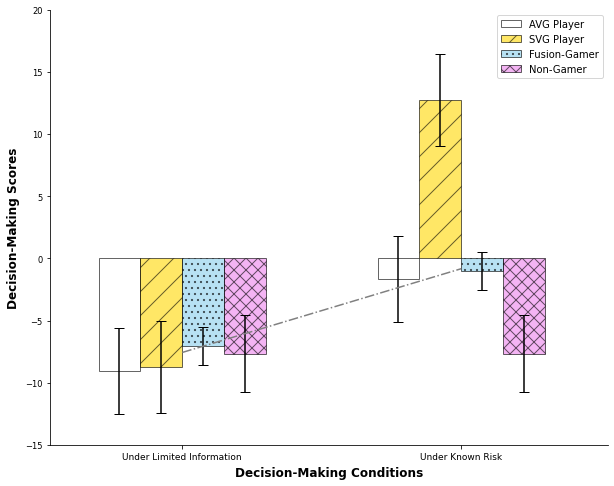

In [83]:
# prepare columns for bar plot
avg_control = np.array(avg['dm_under_limited'])
avg_congruent = np.array(avg['dm_under_risk'])

svg_control = np.array(svg['dm_under_limited'])
svg_congruent = np.array(svg['dm_under_risk'])

f_control = np.array(fusion['dm_under_limited'])
f_congruent = np.array(fusion['dm_under_risk'])

n_control = np.array(ngamer['dm_under_limited'])
n_congruent = np.array(ngamer['dm_under_risk'])

# Mean of each group
avg_t_mean = np.mean(avg_control)
avg_c_mean = np.mean(avg_congruent)


svg_t_mean = np.mean(svg_control)
svg_c_mean = np.mean(svg_congruent)


f_t_mean = np.mean(f_control)
f_c_mean = np.mean(f_congruent)


n_t_mean = np.mean(n_control)
n_c_mean = np.mean(n_congruent)


# prepare columns for bar plot
rt_trol = np.array(df['dm_under_limited'])
rt_con = np.array(df['dm_under_risk'])

# get mean
trol_mean = np.mean(rt_trol)
con_mean = np.mean(rt_con)

# sem of str_c_rt_avg_control, str_c_rt_avg_congruent, str_c_rt_avg_incongruent

def sem(series):
    sample_sem = np.std(series, ddof = 1) / np.sqrt(np.size(series))
    return sample_sem

#########
avg_t_sem = sem(avg_control)
avg_c_sem = sem(avg_congruent)


svg_t_sem = sem(svg_control)
svg_c_sem = sem(svg_congruent)


f_t_sem = sem(f_control)
f_c_sem = sem(f_congruent)


n_t_sem = sem(n_control)
n_c_sem = sem(n_congruent)


#########
# trol_sem= np.std(rt_trol, ddof=1) / np.sqrt(np.size(rt_trol))
# con_sem = np.std(rt_con, ddof=1) / np.sqrt(np.size(rt_con))
# incon_sem = np.std(rt_incon, ddof = 1) / np.sqrt(np.size(rt_incon))

# Create lists for xticks of bar plot
conditions = ['Under Limited Information', 'Under Known Risk']
avgs = [avg_t_mean, avg_c_mean]
svgs = [svg_t_mean, svg_c_mean]
fs = [f_t_mean, f_c_mean]
ns = [n_t_mean, n_t_mean]

# plot the bar plot
fig, ax = plt.subplots(figsize = (10, 8))
width = 0.15  # the width of the bars

x1 = np.arange(len(conditions))  # the label locations
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]

ax.bar(x1, avgs, yerr=avg_t_sem, ecolor = 'black', alpha = 0.6, color = 'white', edgecolor = 'black', 
       width = width, label = 'AVG Player', capsize = 5) 
ax.bar(x2, svgs, yerr=svg_t_sem, ecolor = 'black', alpha = 0.6, color = 'gold', edgecolor = 'black', 
       hatch = '/', width = width, label = 'SVG Player', capsize = 5)
ax.bar(x3, fs, yerr=f_t_sem, ecolor = 'black', alpha = 0.6, color = 'skyblue', edgecolor = 'black', 
       hatch = '..', width = width, label = 'Fusion-Gamer', capsize = 5)
ax.bar(x4, ns, yerr=n_t_sem, ecolor = 'black', alpha = 0.6, color = 'violet', edgecolor = 'black', 
       hatch = 'xx', width = width, label = 'Non-Gamer', capsize = 5)

ax.plot([0.225, 01.225], [trol_mean, con_mean], '-.')

ax.set_xticks([0.225, 01.225])
ax.set_ylabel('Decision-Making Scores', fontsize = 12)
ax.set_xticklabels(conditions, fontsize = 9)
ax.set_xlabel('Decision-Making Conditions', fontsize = 12)
ax.yaxis.grid(False)
ax.legend()

# Save the figure and show
plt.savefig('groupbar_DMSscore')
plt.show()

In [82]:
print(avg['dm_under_risk'])

print(svg['dm_under_risk'])

11     -2
17     26
26    -16
34     -2
40     -2
44     52
52     -8
55     10
56     10
72    -10
85      2
87     12
99    -24
104    42
106   -32
107   -26
108   -60
Name: dm_under_risk, dtype: int64
27     60
35     38
36     10
38     36
67      0
69      0
93    -30
113   -12
Name: dm_under_risk, dtype: int64


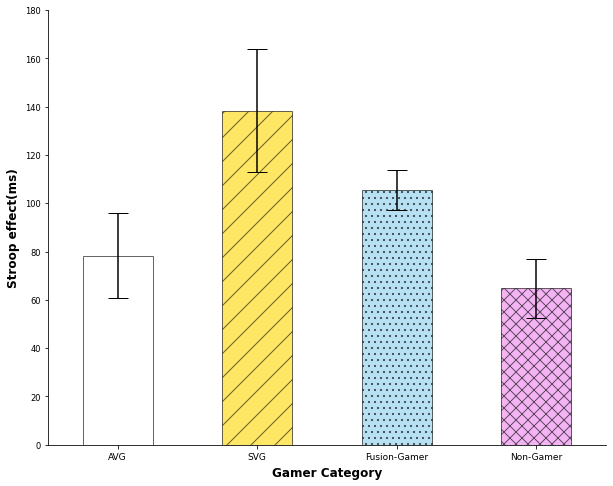

In [84]:
# prepare columns for bar plot
avg_stroop = np.array(avg['stroop_effect'])
svg_stroop = np.array(svg['stroop_effect'])
fusion_stroop = np.array(fusion['stroop_effect'])
ngamer_stroop = np.array(ngamer['stroop_effect'])

# get mean
avg_mean = np.mean(avg_stroop)
svg_mean = np.mean(svg_stroop)
fusion_mean = np.mean(fusion_stroop)
ngamer_mean = np.mean(ngamer_stroop)

# get sem
avg_sem = np.std(avg_stroop, ddof=1) / np.sqrt(np.size(avg_stroop))
svg_sem = np.std(svg_stroop, ddof=1) / np.sqrt(np.size(svg_stroop))
fusion_sem = np.std(fusion_stroop, ddof = 1) / np.sqrt(np.size(fusion_stroop))
ngamer_sem = np.std(ngamer_stroop, ddof = 1) / np.sqrt(np.size(ngamer_stroop))

# Create lists for xticks of bar plot
conditions = ['AVG', 'SVG', 'Fusion-Gamer', 'Non-Gamer']

# plot the bar plot
fig, ax = plt.subplots(figsize = (10, 8))

ax.bar(1, avg_mean, yerr=avg_sem, ecolor = 'black', alpha = 0.6, color = 'white', edgecolor = 'black', 
       width = 0.5)
ax.bar(2, svg_mean, yerr=svg_sem, ecolor = 'black', alpha = 0.6, color = 'gold', edgecolor = 'black', 
       hatch = '/', width = 0.5)
ax.bar(3, fusion_mean, yerr=fusion_sem, ecolor = 'black', alpha = 0.6, color = 'skyblue', edgecolor = 'black', 
       hatch = '..', width = 0.5)
ax.bar(4, ngamer_mean, yerr=ngamer_sem, ecolor = 'black', alpha = 0.6, color = 'violet', edgecolor = 'black', 
       hatch = 'xx', width = 0.5)


ax.set_ylabel('Stroop effect(ms)', fontsize = 12)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(conditions, fontsize = 9)
ax.set_xlabel('Gamer Category', fontsize = 12)
ax.yaxis.grid(False)

# Save the figure and show
plt.savefig('Stroop_btgroup(colored)')
plt.show()

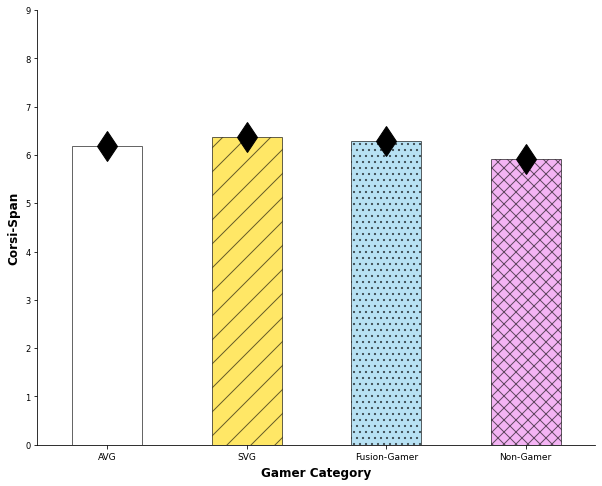

In [85]:
# prepare columns for bar plot
avg_data = np.array(avg['cspan'])
svg_data = np.array(svg['cspan'])
fusion_data = np.array(fusion['cspan'])
ngamer_data = np.array(ngamer['cspan'])

# get mean
avg_mean = np.mean(avg_data)
svg_mean = np.mean(svg_data)
fusion_mean = np.mean(fusion_data)
ngamer_mean = np.mean(ngamer_data)

# get sem
avg_sem = np.std(avg_stroop, ddof=1) / np.sqrt(np.size(avg_stroop))
svg_sem = np.std(svg_stroop, ddof=1) / np.sqrt(np.size(svg_stroop))
fusion_sem = np.std(fusion_stroop, ddof = 1) / np.sqrt(np.size(fusion_stroop))
ngamer_sem = np.std(ngamer_stroop, ddof = 1) / np.sqrt(np.size(ngamer_stroop))

# Create lists for xticks of bar plot
conditions = ['AVG', 'SVG', 'Fusion-Gamer', 'Non-Gamer']

# plot the bar plot
fig, ax = plt.subplots(figsize = (10, 8))

ax.bar(1, avg_mean, yerr=avg_sem, ecolor = 'black', alpha = 0.6, color = 'white', edgecolor = 'black', 
       width = 0.5, error_kw = {'lolims': 1, 'uplims': 1})
ax.bar(2, svg_mean, yerr=svg_sem, ecolor = 'black', alpha = 0.6, color = 'gold', edgecolor = 'black', 
       hatch = '/', width = 0.5, error_kw = {'lolims': 1, 'uplims': 1})
ax.bar(3, fusion_mean, yerr=fusion_sem, ecolor = 'black', alpha = 0.6, color = 'skyblue', edgecolor = 'black', 
       hatch = '..', width = 0.5, error_kw = {'lolims': 1, 'uplims': 1})
ax.bar(4, ngamer_mean, yerr=ngamer_sem, ecolor = 'black', alpha = 0.6, color = 'violet', edgecolor = 'black', 
       hatch = 'xx', width = 0.5, error_kw = {'lolims': 1, 'uplims': 1})

ax.set_ylabel('Corsi-Span', fontsize = 12)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(conditions, fontsize = 9)
ax.set_xlabel('Gamer Category', fontsize = 12)
ax.yaxis.grid(False)
ax.set_ylim([0, 9])

# Save the figure and show
plt.savefig('Cspan_btgroup(colored)')
plt.show()

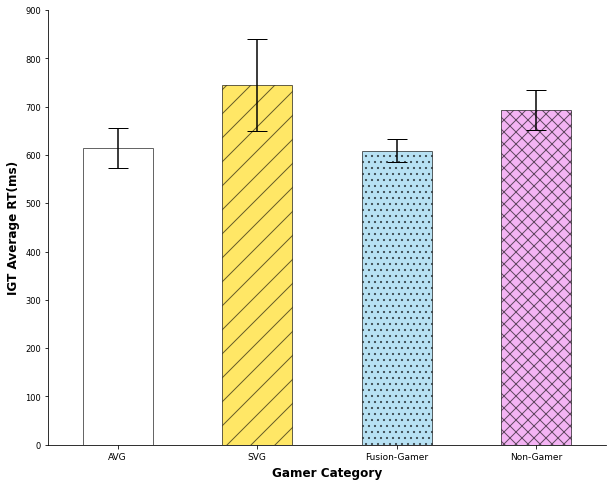

In [86]:
# prepare columns for bar plot
avg_stroop = np.array(avg['igt_rt_avg'])
svg_stroop = np.array(svg['igt_rt_avg'])
fusion_stroop = np.array(fusion['igt_rt_avg'])
ngamer_stroop = np.array(ngamer['igt_rt_avg'])

# get mean
avg_mean = np.mean(avg_stroop)
svg_mean = np.mean(svg_stroop)
fusion_mean = np.mean(fusion_stroop)
ngamer_mean = np.mean(ngamer_stroop)

# get sem
avg_sem = np.std(avg_stroop, ddof=1) / np.sqrt(np.size(avg_stroop))
svg_sem = np.std(svg_stroop, ddof=1) / np.sqrt(np.size(svg_stroop))
fusion_sem = np.std(fusion_stroop, ddof = 1) / np.sqrt(np.size(fusion_stroop))
ngamer_sem = np.std(ngamer_stroop, ddof = 1) / np.sqrt(np.size(ngamer_stroop))

# Create lists for xticks of bar plot
conditions = ['AVG', 'SVG', 'Fusion-Gamer', 'Non-Gamer']

# plot the bar plot
fig, ax = plt.subplots(figsize = (10, 8))

ax.bar(1, avg_mean, yerr=avg_sem, ecolor = 'black', alpha = 0.6, color = 'white', edgecolor = 'black', 
       width = 0.5)
ax.bar(2, svg_mean, yerr=svg_sem, ecolor = 'black', alpha = 0.6, color = 'gold', edgecolor = 'black', 
       hatch = '/', width = 0.5)
ax.bar(3, fusion_mean, yerr=fusion_sem, ecolor = 'black', alpha = 0.6, color = 'skyblue', edgecolor = 'black', 
       hatch = '..', width = 0.5)
ax.bar(4, ngamer_mean, yerr=ngamer_sem, ecolor = 'black', alpha = 0.6, color = 'violet', edgecolor = 'black', 
       hatch = 'xx', width = 0.5)


ax.set_ylabel('IGT Average RT(ms)', fontsize = 12)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(conditions, fontsize = 9)
ax.set_xlabel('Gamer Category', fontsize = 12)
ax.yaxis.grid(False)

# Save the figure and show
plt.savefig('IGTRT_btgroup(colored)')
plt.show()

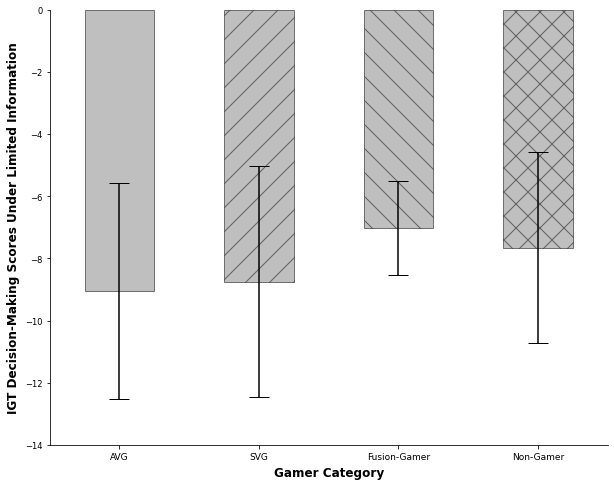

In [227]:
# prepare columns for bar plot
avg_stroop = np.array(avg['dm_under_limited'])
svg_stroop = np.array(svg['dm_under_limited'])
fusion_stroop = np.array(fusion['dm_under_limited'])
ngamer_stroop = np.array(ngamer['dm_under_limited'])

# get mean
avg_mean = np.mean(avg_stroop)
svg_mean = np.mean(svg_stroop)
fusion_mean = np.mean(fusion_stroop)
ngamer_mean = np.mean(ngamer_stroop)

# get sem
avg_sem = np.std(avg_stroop, ddof=1) / np.sqrt(np.size(avg_stroop))
svg_sem = np.std(svg_stroop, ddof=1) / np.sqrt(np.size(svg_stroop))
fusion_sem = np.std(fusion_stroop, ddof = 1) / np.sqrt(np.size(fusion_stroop))
ngamer_sem = np.std(ngamer_stroop, ddof = 1) / np.sqrt(np.size(ngamer_stroop))

# Create lists for xticks of bar plot
conditions = ['AVG', 'SVG', 'Fusion-Gamer', 'Non-Gamer']

# plot the bar plot
fig, ax = plt.subplots(figsize = (10, 8))

ax.bar(1, avg_mean, yerr=avg_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       width = 0.5)
ax.bar(2, svg_mean, yerr=svg_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       hatch = '/', width = 0.5)
ax.bar(3, fusion_mean, yerr=fusion_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       hatch = '\\', width = 0.5)
ax.bar(4, ngamer_mean, yerr=ngamer_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       hatch = '\/', width = 0.5)


ax.set_ylabel('IGT Decision-Making Scores Under Limited Information', fontsize = 12)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(conditions, fontsize = 9)
ax.set_xlabel('Gamer Category', fontsize = 12)
ax.yaxis.grid(False)

# Save the figure and show
plt.savefig('DMSunderL_btgroup')
plt.show()

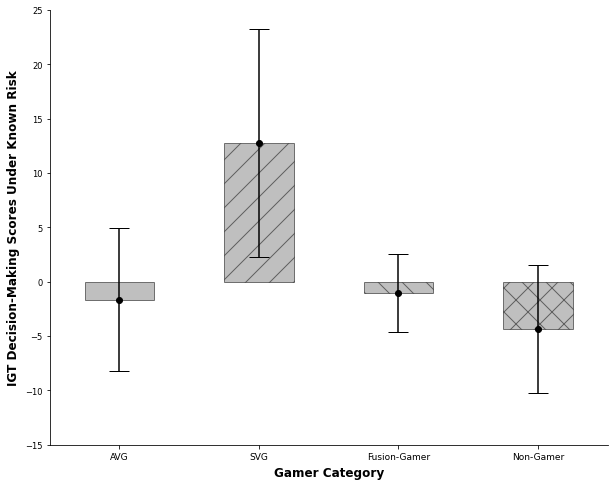

In [235]:
# prepare columns for bar plot
avg_stroop = np.array(avg['dm_under_risk'])
svg_stroop = np.array(svg['dm_under_risk'])
fusion_stroop = np.array(fusion['dm_under_risk'])
ngamer_stroop = np.array(ngamer['dm_under_risk'])

# get mean
avg_mean = np.mean(avg_stroop)
svg_mean = np.mean(svg_stroop)
fusion_mean = np.mean(fusion_stroop)
ngamer_mean = np.mean(ngamer_stroop)

# get sem
avg_sem = np.std(avg_stroop, ddof=1) / np.sqrt(np.size(avg_stroop))
svg_sem = np.std(svg_stroop, ddof=1) / np.sqrt(np.size(svg_stroop))
fusion_sem = np.std(fusion_stroop, ddof = 1) / np.sqrt(np.size(fusion_stroop))
ngamer_sem = np.std(ngamer_stroop, ddof = 1) / np.sqrt(np.size(ngamer_stroop))

# Create lists for xticks of bar plot
conditions = ['AVG', 'SVG', 'Fusion-Gamer', 'Non-Gamer']

# plot the bar plot
fig, ax = plt.subplots(figsize = (10, 8))

ax.bar(1, avg_mean, yerr=avg_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       width = 0.5)
ax.bar(2, svg_mean, yerr=svg_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       hatch = '/', width = 0.5)
ax.bar(3, fusion_mean, yerr=fusion_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       hatch = '\\', width = 0.5)
ax.bar(4, ngamer_mean, yerr=ngamer_sem, ecolor = 'black', alpha = 0.5, color = 'gray', edgecolor = 'black', 
       hatch = '\/', width = 0.5)
ax.plot([1, 2, 3,4], [avg_mean, svg_mean, fusion_mean, ngamer_mean], 'ko')

ax.set_ylabel('IGT Decision-Making Scores Under Known Risk', fontsize = 12)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(conditions, fontsize = 9)
ax.set_xlabel('Gamer Category', fontsize = 12)
ax.yaxis.grid(False)

# Save the figure and show
plt.savefig('DMSunderR_btgroup')
plt.show()

In [61]:
columns = ['before_First-Person Shooter/Third-Person Shooter',
       'before_Action-Role-Playing/Adventure',
       'before_Real-Time Strategy/MOBA',
       'before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing',
       'before_2D Turn-Based Strategy/Card Game', 'before_3D Puzzle Game',
       'before_Sports/Driving', 'before_Music Game', 'before_Others',
       'during_First-Person Shooter/Third-Person Shooter',
       'during_Action-Role-Playing/Adventure',
       'during_Real-Time Strategy/MOBA',
       'during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing',
       'during_2D Turn-Based Strategy/Card Game', 'during_3D Puzzle Game',
       'during_Sports/Driving', 'during_Music Game', 'during_Others', 'cspan','stroop_effect',
       'igt_rt_avg', 'dm_under_limited',
       'dm_under_risk']
dff_corr = df[columns]
dff_corr.columns = ['Before-FPS/TPS',
       'Before-ARPG/Adventure',
       'Before-RTS/MOBA',
       'Before-MMORPG/TBS',
       'Before-3D TBS/CG', 'Before-3D PG',
       'Before-Spo./Dri.', 'Before-MG', 'Before-Others',
        'During-FPS/TPS',
       'During-ARPG/Adventure',
       'During-RTS/MOBA',
       'During-MMORPG/TBS',
       'During-3D TBS/CG', 'During-3D PG',
       'During-Spo./Dri.', 'During-MG', 'During-Others',
        'Corsi-Span','Stroop-Effect',
       'IGT average RT', 'DMS under limited info.',
       'DMS under known risk']

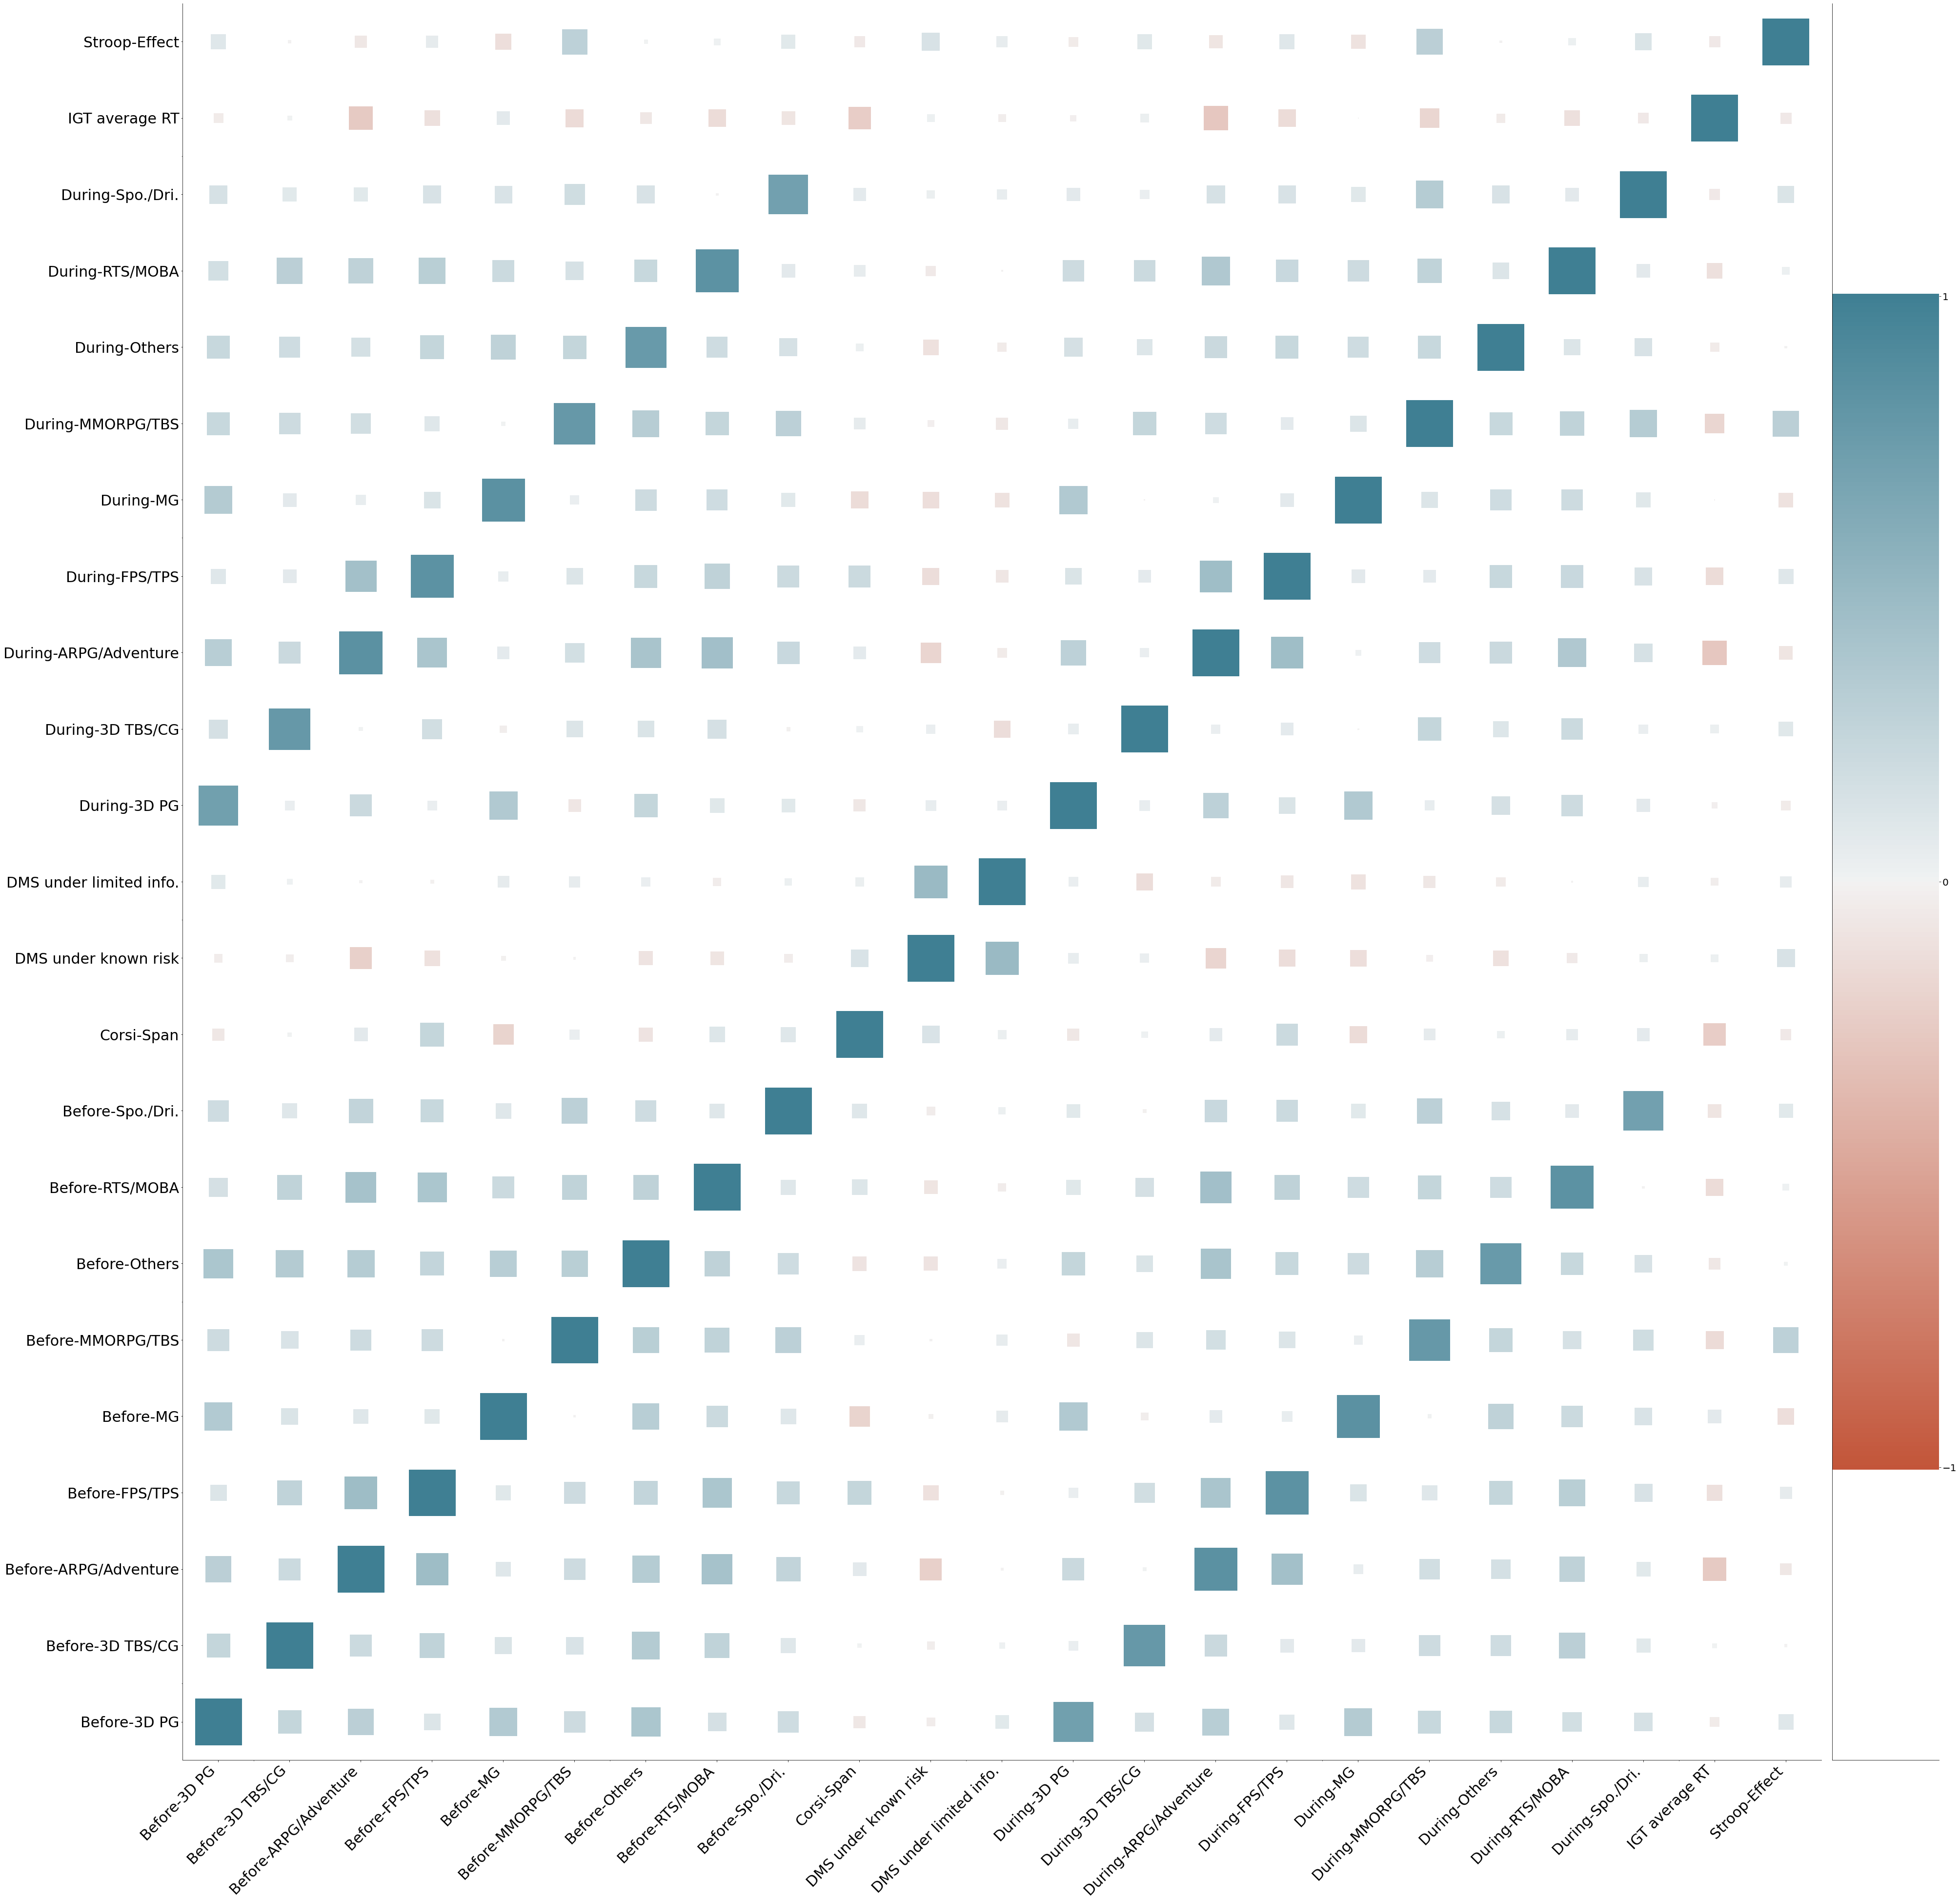

In [77]:
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots(figsize = (50, 50))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    ax.axis('tight')
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 9000
    
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
        ind = int(val_position * (n_colors - 1)) # target index in the color palette
        return palette[ind]
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot
    

    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        c=df_corr['value'].apply(value_to_color), # Vector of square color values, mapped to color palette
        marker='s' # Use square as scatterplot marker
    )

    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right', fontsize = 30)
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels, fontsize = 30)
    
corr = dff_corr.corr()
df_corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
df_corr.columns = ['x', 'y', 'value']
heatmap(
    x=df_corr['x'],
    y=df_corr['y'],
    size=df_corr['value'].abs()
)
    
ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

col_x = [0]*len(palette) # Fixed x coordinate for the bars
bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

bar_height = bar_y[1] - bar_y[0]
ax.barh(
    y=bar_y,
    width=[5]*len(palette), # Make bars 5 units wide
    left=col_x, # Make bars start at 0
    height=bar_height,
    color=palette,
    linewidth=0
    )
ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
ax.grid(False) # Hide grid
ax.set_facecolor('white') # Make background white
ax.set_xticks([]) # Remove horizontal ticks
ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max|
ax.yaxis.tick_right() # Show vertical ticks on the righ
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)